# Estimating Burned Area Using RSensePy

This notebook introduces the biophyical indexcalculator, RSensePy and guides users on how to calculate one of the increasingly available vegetation indices therein.

### CASE 1 - Mapping Maui's Wildfires. 

Between August 7th and 9th, Hurricane Dora, a Category 4 storm, with max wind speeds above 130 miles per hour, passed by Hawaii. At approximatly 3:00am on August 8th, brush fire was reported in the Olinda Road area of Kula, an area in central Maui. Fueled by the severe storms from Dora, this fire as well as others like it would spring up across parts of West and Central Maui, raging on for 4 days. The aftermath would see over 100 people dead, an estimated 2200 building destroyed, and much of the touristic and economic hub of Lahaina, on the island’s western edge, reduced to ashes. 

The internet is filled with shpocking images of this devastation, mostly provided by on ground reporters and affected residents. Using Remote sening, by way of freely available Landsat 9 imagery, and the RSensePy biophysical Index calculator, we will now visulaize the damage caused especially in Lahaina, the area worst hit.

For more details on RSensePy and how to use it, please read the docs. (https://rsensepy.readthedocs.io/en/latest/installation.html)

In [1]:
pip install RSensePy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe -m pip install --upgrade pip


In [2]:
import RSensePy as rp

In [3]:
before= rp.L8("C://test//LC08_L2SP_063046_20230807_20230812_02_T1")
after= rp.L8("C://test//LC09_L2SP_063046_20230815_20230817_02_T1")

Getting the metadat is quite straightforward, just call the meta method.

In [4]:
before.meta()



					Mission = L
 
					Sensor = C

					Satellite= 08

					Correction Level = L2SP

					Path = 063

					Row = 046

					Acquisition Date = 20230807

					Processing Data = 20230812

					Collection Number = 02

					Collection Category = T1



In [5]:
after.meta()



					Mission = L
 
					Sensor = C

					Satellite= 09

					Correction Level = L2SP

					Path = 063

					Row = 046

					Acquisition Date = 20230815

					Processing Data = 20230817

					Collection Number = 02

					Collection Category = T1



From the metadata, we see the acquisition/sensing date for the before image is 7th of August, before the fire startes, while the after image is acquired on the 15th of August after the fires have sucessfully been put out.

cloudMask calculation completed
normDifVal calculation completed
Writing raster completed


C:\Users\xeon\AppData\Roaming\Python\Python39\site-packages\RSensePy\__init__.py:193: RuntimeWarning: invalid value encountered in true_divide
  normDifVal = numerator / denominator


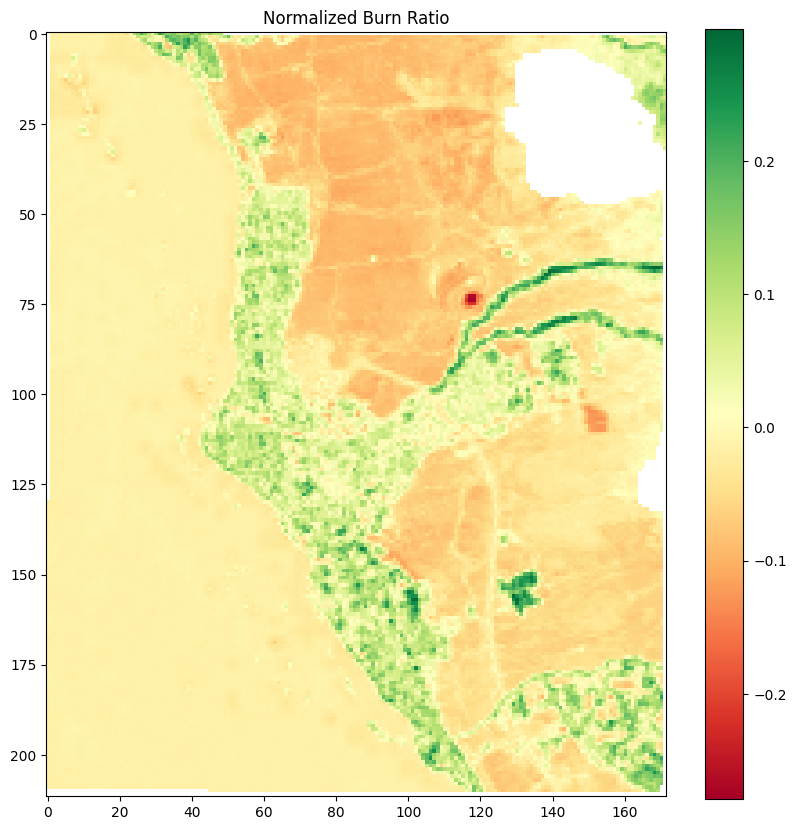

In [7]:
#set bounding box, within which the procesising and output will be clipped. 
#An alternative is to use a pre-existing shapefile

lahainashp= "lahania.shp"
beforeNBR= "output/beforeNBR.tif" #output folder should be created a-priori

#calling the NBR method to calculate the Normalied Burn Ratio.
before.NBR(cloud=True, save_location=beforeNBR, shp_location=lahainashp, visualise=True)

cloudMask calculation completed
normDifVal calculation completed
Writing raster completed


C:\Users\xeon\AppData\Roaming\Python\Python39\site-packages\RSensePy\__init__.py:193: RuntimeWarning: invalid value encountered in true_divide
  normDifVal = numerator / denominator


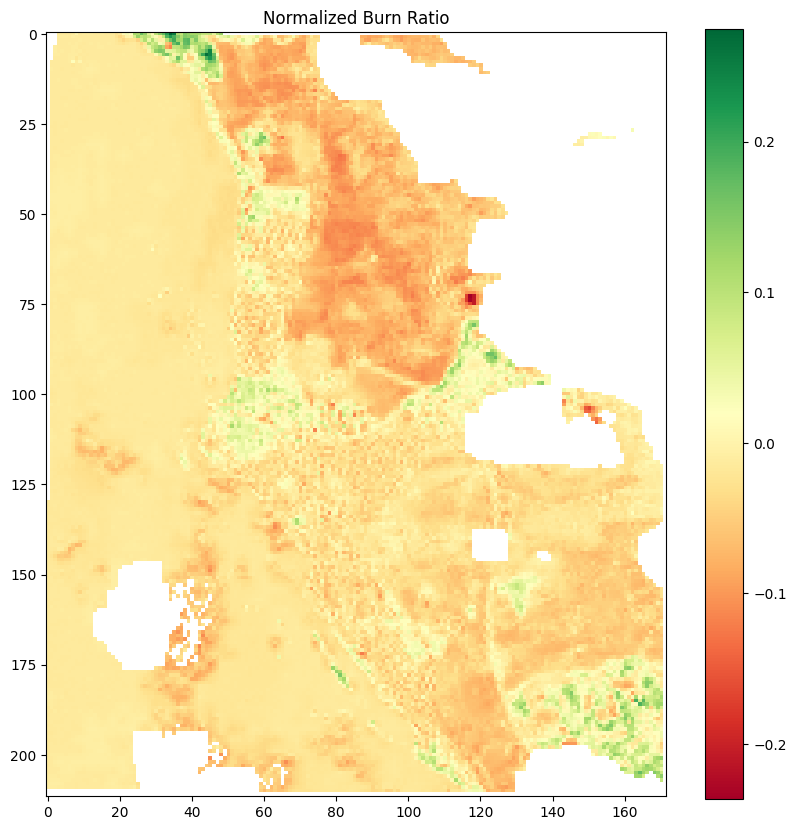

In [8]:
afterNBR= "output/afterNBR.tif"

#calling the NBR method to calculate the Normalied Burn Ratio.
after.NBR(cloud=True, save_location=afterNBR, shp_location=lahainashp, visualise=True)

In [9]:
#calculating the difference
! pip install rasterio


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import rasterio as rio
import numpy as np

In [11]:
#calculating the differnce between before and after images

pre_nbr= rio.open(beforeNBR)
post_nbr= rio.open(afterNBR)

pre= pre_nbr.read()
post= post_nbr.read()

diffNBR= post.astype(rio.float32) - pre.astype(rio.float32)

meta = pre_nbr.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)

#saving the differnce to file

diffNBR_path = 'output/diffNBR.tif'

with rio.open(diffNBR_path, 'w', **meta) as dest:
    dest.write(diffNBR.astype(rio.float32))

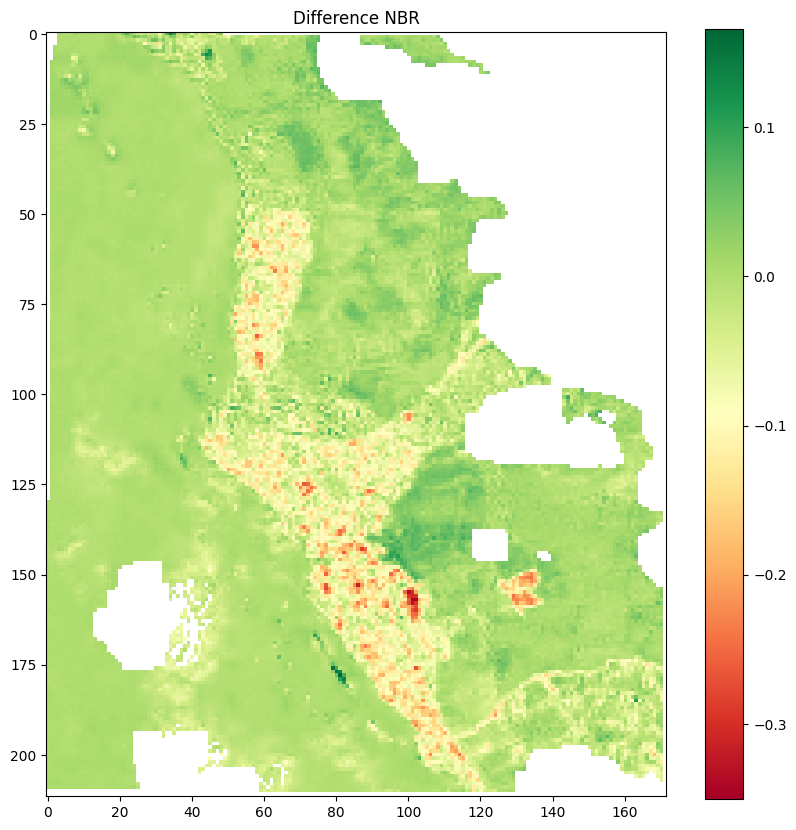

In [12]:
#visualising the calculated difference

import matplotlib.pyplot as plt

img = rio.open(diffNBR_path)
img_r = img.read()
diffNBR_img = np.asarray(img_r)

plt.figure(figsize=(10, 10))
plt.imshow(img_r.squeeze(), cmap='RdYlGn')
plt.title("Difference NBR")
plt.colorbar()
plt.show()

#img = rio.open(diffNBR_path)
#img_r = img.read()
#diffNBR_img = np.asarray(img_r)